# Model With Multiple Inputs

Example created by Wilson Rocha Lacerda Junior

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.

## Generating 2 input 1 output sample data


The data is generated by simulating the following model:

$y_k = 0.4y_{k-1}^2 + 0.1y_{k-1}x1_{k-1} + 0.6x2_{k-1} -0.3x1_{k-1}x2_{k-2} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.001$


In [ ]:
pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function import Polynomial
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_results
from sysidentpy.utils.generate_data import get_miso_data

In [2]:
x_train, x_valid, y_train, y_valid = get_miso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

There is a specific difference for multiple input data.

- You have to pass the lags for each input in a nested list (*e.g., [[1, 2], [1, 2]]*)

The remainder settings remains the same.

## Build the model

In [7]:
basis_function = Polynomial(degree=2)
estimator = LeastSquares()

model = FROLS(
    order_selection=True,
    n_terms=4,
    ylag=2,
    xlag=[[1, 2], [1, 2]],
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
    err_tol=None,
)

In [8]:
model.fit(X=x_train, y=y_train)

## Model evaluation

0.00314141814133057
       Regressors   Parameters             ERR
0         x2(k-1)   5.9999E-01  9.15006949E-01
1  x2(k-2)x1(k-1)  -3.0010E-01  4.31748224E-02
2        y(k-1)^2   3.9976E-01  4.15131661E-02
3   x1(k-1)y(k-1)   1.0028E-01  2.96827987E-04


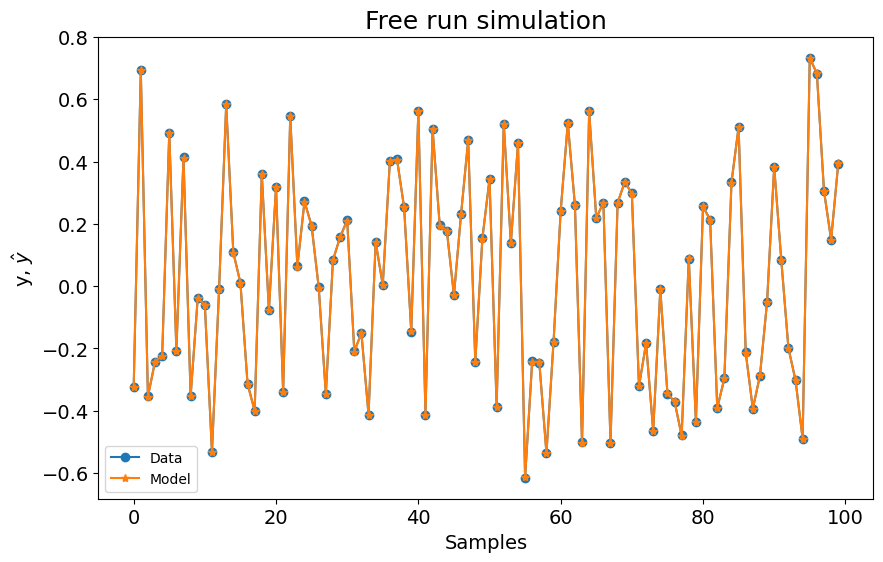

In [11]:
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)
plot_results(y=y_valid, yhat=yhat, n=1000)

Text(0, 0.5, 'Information Criteria')

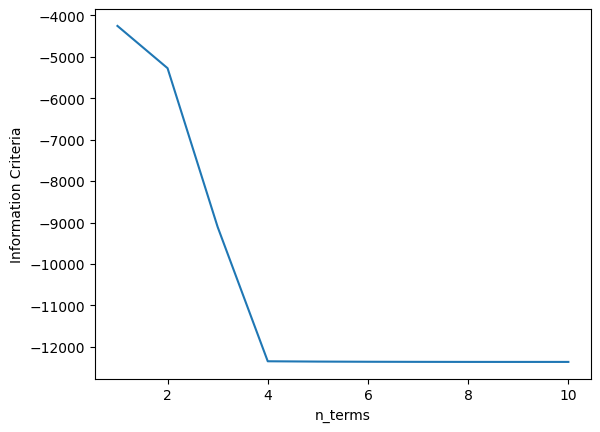

In [12]:
xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel("n_terms")
plt.ylabel("Information Criteria")